<a href="https://colab.research.google.com/github/MMENDONNCA/Spotify-Song-Popularity-Prediction/blob/main/Previs%C3%A3o_da_popularidade_de_m%C3%BAsicas_do_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão da popularidade de músicas do spotify:🎧

## Sobre a base de dados:🎲
Este é um conjunto de dados de faixas do Spotify em uma variedade de 125 gêneros diferentes. Cada faixa possui alguns recursos de áudio associados a ela.

## Uso da base: 🛠️
O conjunto de dados pode ser usado para:

- Construindo um sistema de recomendação com base em alguma entrada ou preferência do usuário
- Finalidades de classificação com base em recursos de áudio e gêneros disponíveis
- Qualquer outro aplicativo que você possa imaginar. Sinta-se à vontade para discutir!

## **Objetivo do nosso projeto:**🎯

Este notebook contempla a criação de um **modelo preditivo para classificar a popularidade de músicas** utilizando a base de dados "Spotify Tracks Dataset" do Kaggle.

O link desta base e mais detalhes se encontra em:
https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/drive/My Drive/projeto_popularidade/dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.shape

(114000, 21)

In [ ]:
df.shape



(114000, 21)

# **Análise de dados exploratória** 🔎

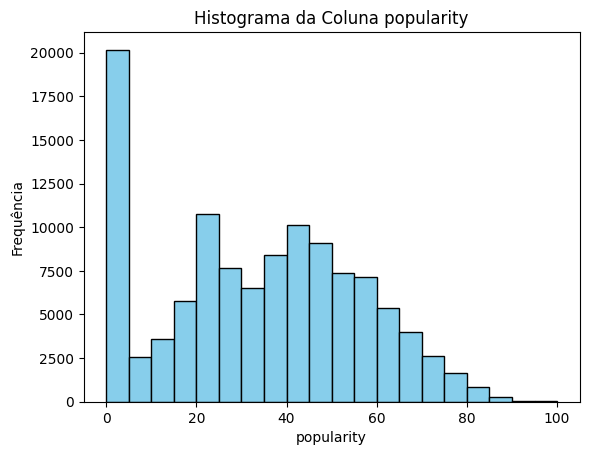

In [ ]:
# Analisando a coluna "popularity" para criar a nossa target
plt.hist(df['popularity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('popularity')
plt.ylabel('Frequência')
plt.title('Histograma da Coluna popularity')
plt.show()


--- Análise da Distribuição das Características Sonoras ---


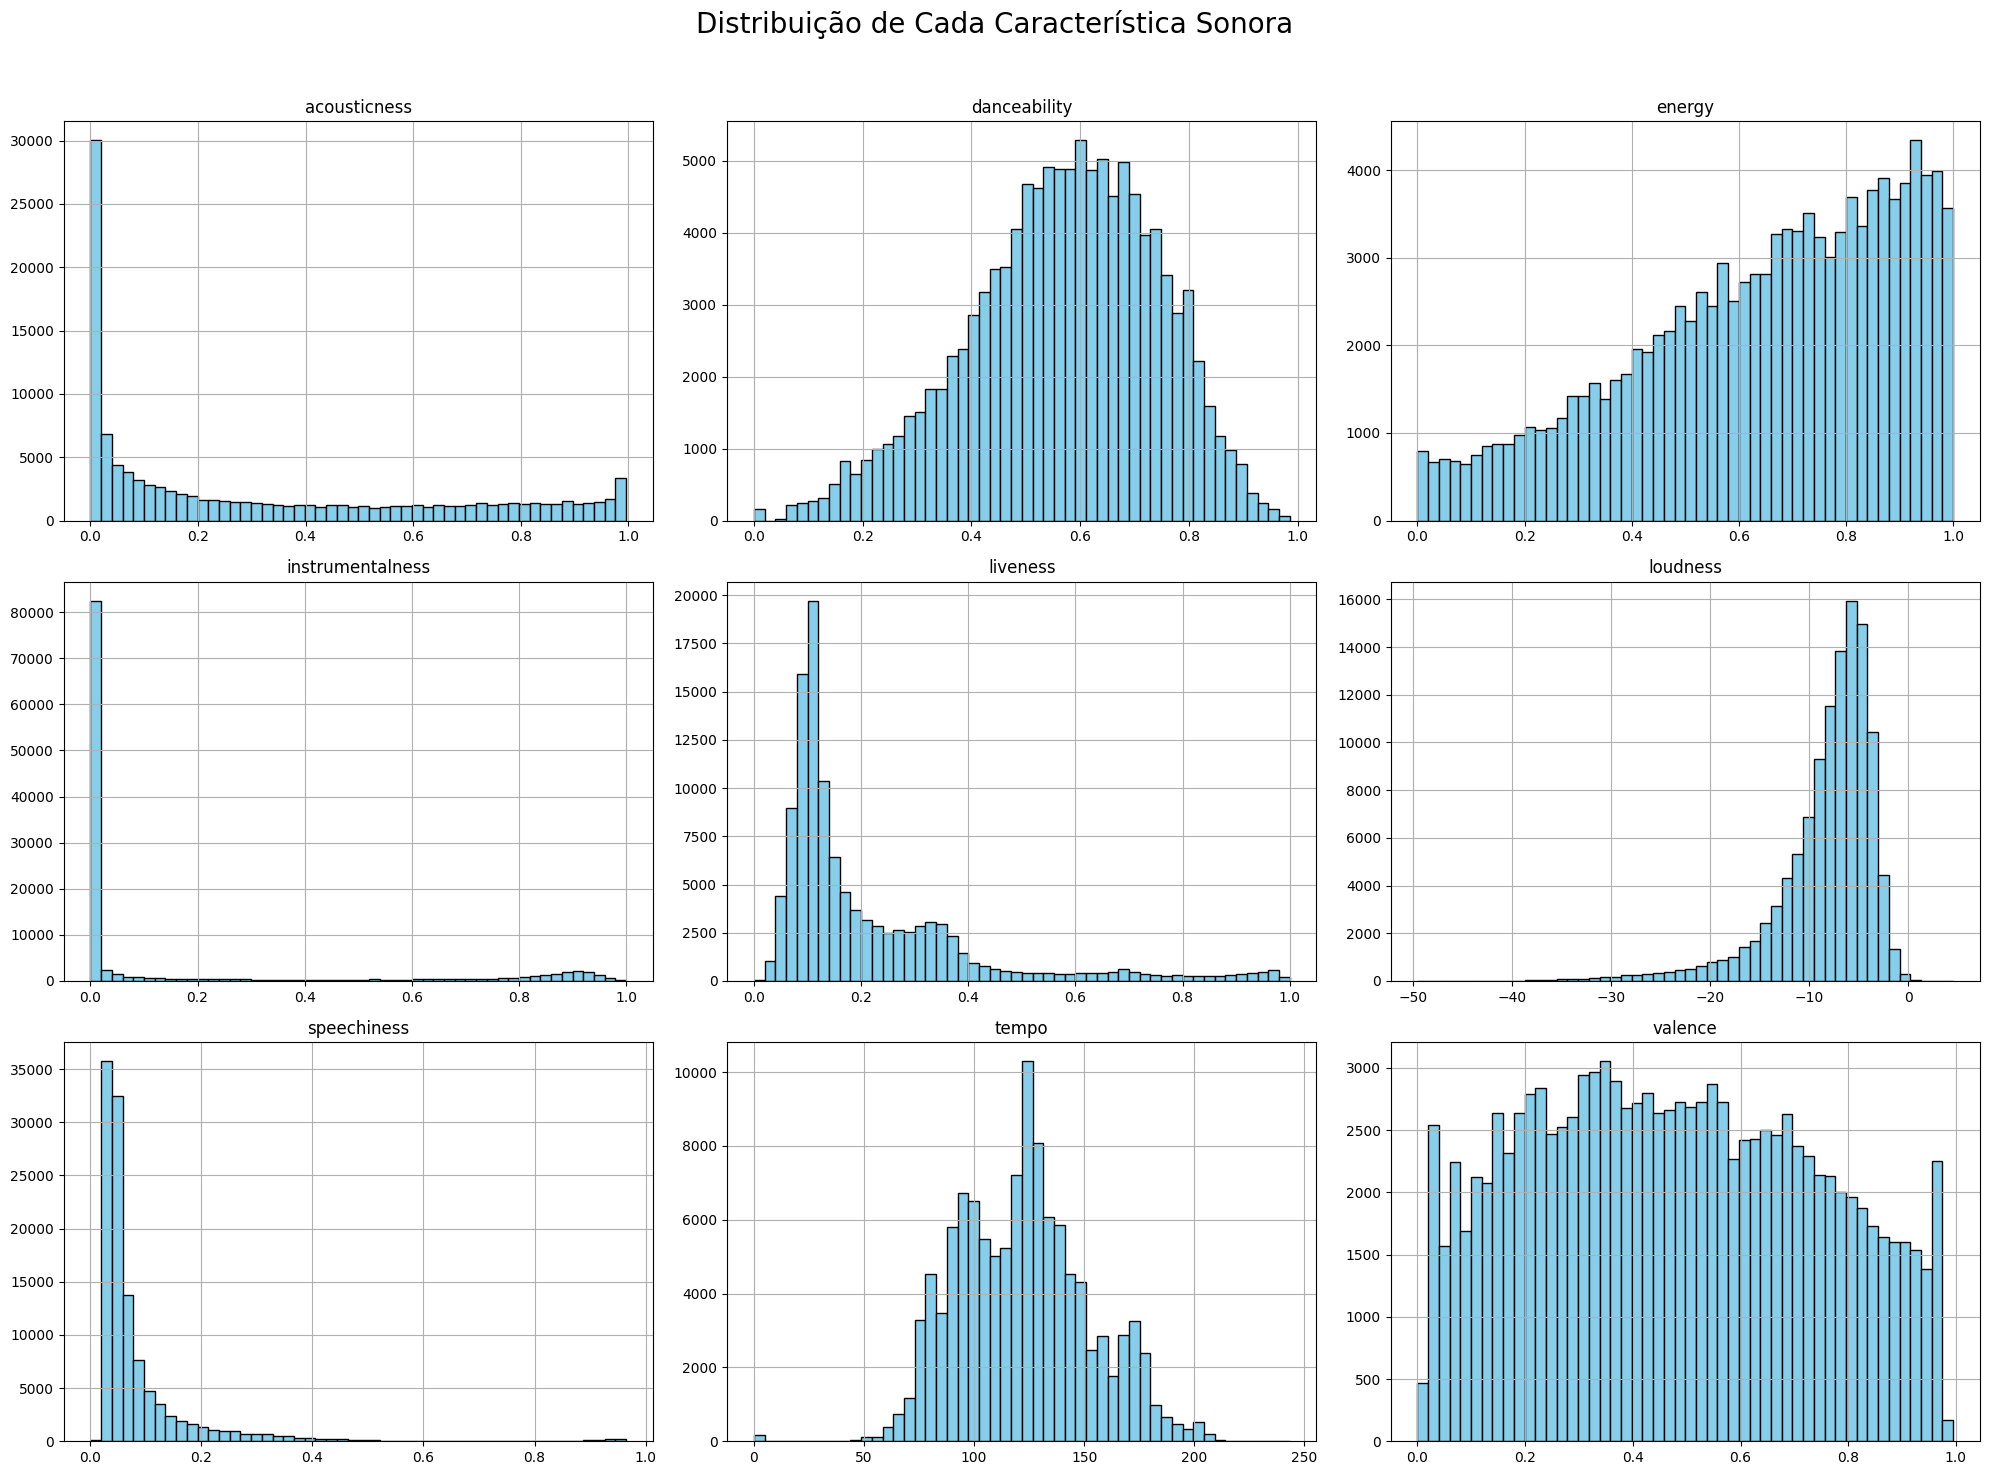

In [ ]:
print("\n--- Análise da Distribuição das Características Sonoras ---")

# Selecionando apenas as colunas de características sonoras para análise
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                  'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Criando um grid de histogramas para cada característica
df[audio_features].hist(figsize=(20, 15), bins=50, color='skyblue', edgecolor='black')
plt.suptitle('Distribuição de Cada Característica Sonora', size=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Insights:
# - 'acousticness' e 'instrumentalness' mostram que a maioria das músicas tem valores próximos de zero.
# - 'danceability' e 'valence' têm distribuições mais centradas.
# - 'loudness' tem uma forte concentração em valores negativos mais altos (próximos de zero).

In [ ]:
# Descobrir o valor de popularidade que define o Top 10%
top_10_percent_threshold = df['popularity'].quantile(0.90)

# Descobrir o valor de popularidade que define o Top 1%
top_1_percent_threshold = df['popularity'].quantile(0.99)

print(f"Para estar no Top 10%, uma música precisa de popularidade >= {top_10_percent_threshold:.2f}")
print(f"Para estar no Top 1%, uma música precisa de popularidade >= {top_1_percent_threshold:.2f}")

Para estar no Top 10%, uma música precisa de popularidade >= 63.00
Para estar no Top 1%, uma música precisa de popularidade >= 80.00


In [ ]:
df_top10 = df[df['popularity'] >= top_10_percent_threshold]
df_top1 = df[df['popularity'] >= top_1_percent_threshold]


/tmp/ipython-input-1613082975.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=category_counts, palette='viridis')


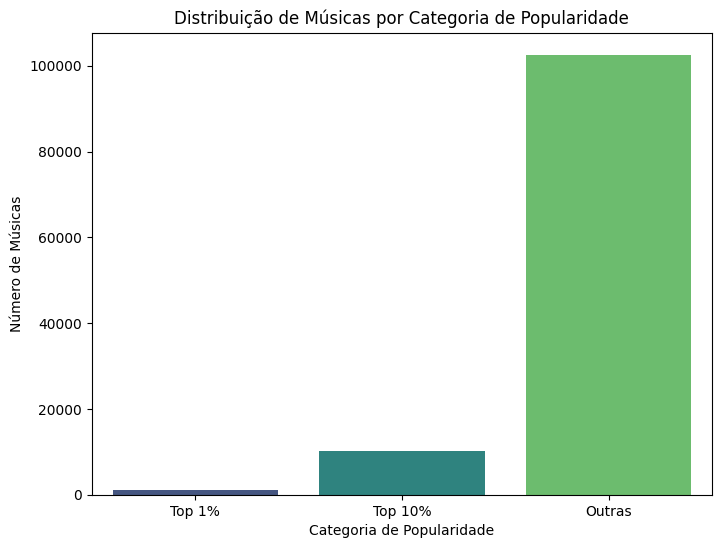

In [ ]:
# Calculando o número de músicas em cada categoria
total_songs = len(df)
top_10_count = len(df_top10)
top_1_count = len(df_top1)
other_count = total_songs - top_10_count

category_counts = pd.DataFrame({
    'Category': ['Top 1%', 'Top 10%', 'Outras'],
    'Count': [top_1_count, top_10_count - top_1_count, other_count]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=category_counts, palette='viridis')
plt.xlabel('Categoria de Popularidade')
plt.ylabel('Número de Músicas')
plt.title('Distribuição de Músicas por Categoria de Popularidade')
plt.show()

In [ ]:
category_counts['Percentage'] = (category_counts['Count'] / total_songs) * 100

print(category_counts)

  Category   Count  Percentage
0   Top 1%    1201    1.053509
1  Top 10%   10234    8.977193
2   Outras  102565   89.969298


In [ ]:
# Lista de características a serem comparadas
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'valence']

# Criar um DataFrame de comparação
comparison_df = pd.DataFrame({
    'Média Geral': df[audio_features].mean(),
    'Média Top 10%': df_top10[audio_features].mean(),
    'Média Top 1%': df_top1[audio_features].mean()
})

print("--- Comparação das Características Sonoras Médias ---")
display(comparison_df)

--- Comparação das Características Sonoras Médias ---


,Média Geral,Média Top 10%,Média Top 1%
acousticness,0.314910,0.255094,0.188426
danceability,0.566800,0.601405,0.648145
energy,0.641383,0.654610,0.682073
instrumentalness,0.156050,0.056574,0.024342
loudness,-8.258960,-7.186974,-6.148108
valence,0.474068,0.492028,0.513800


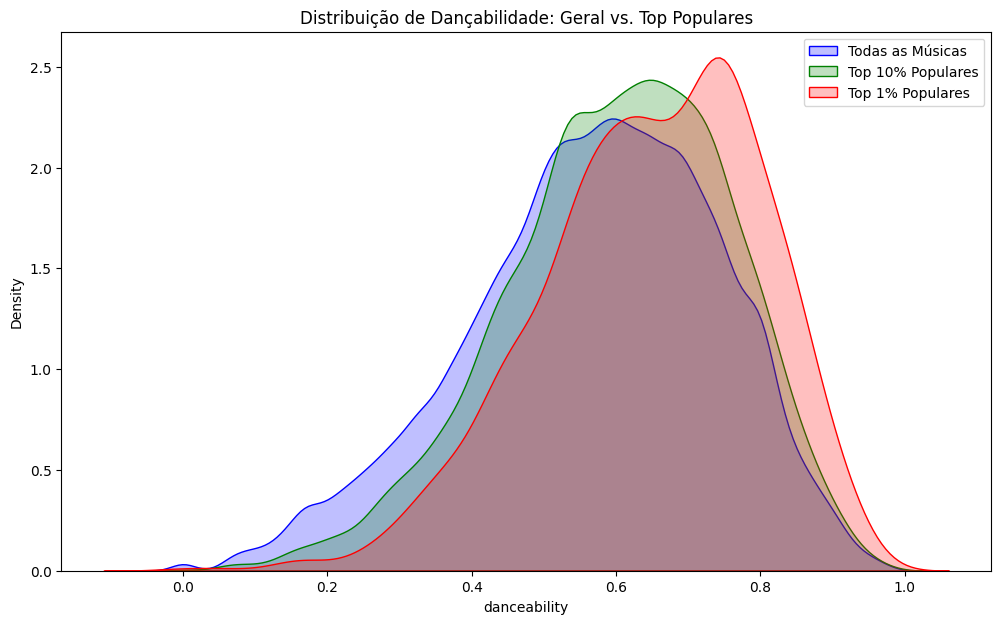

In [ ]:
plt.figure(figsize=(12, 7))
sns.kdeplot(df['danceability'], label='Todas as Músicas', color='blue', fill=True)
sns.kdeplot(df_top10['danceability'], label='Top 10% Populares', color='green', fill=True)
sns.kdeplot(df_top1['danceability'], label='Top 1% Populares', color='red', fill=True)
plt.title('Distribuição de Dançabilidade: Geral vs. Top Populares')
plt.legend()
plt.show()

In [ ]:
def categorize_hit(popularity):
    top_10_percent_threshold = df['popularity'].quantile(0.90)
    top_1_percent_threshold = df['popularity'].quantile(0.99)
    if popularity >= top_1_percent_threshold:
        return 'Top 1% Viral'
    elif popularity >= top_10_percent_threshold:
        return 'Top 10% Popular'
    else:
        return 'Não Popular'
df['hit_category'] = df['popularity'].apply(categorize_hit)

# Vamos considerar "hits" todas as músicas que NÃO são da categoria 'Não Popular'.
# Isso inclui tanto o Top 10% quanto o Top 1%.
df_hits = df[df['hit_category'] != 'Não Popular'].copy()

print(f"Número total de músicas no dataset: {len(df)}")
print(f"Número de músicas consideradas 'Hits' (Top 10%): {len(df_hits)}")
print("-" * 50)


Número total de músicas no dataset: 114000
Número de músicas consideradas 'Hits' (Top 10%): 11435
--------------------------------------------------


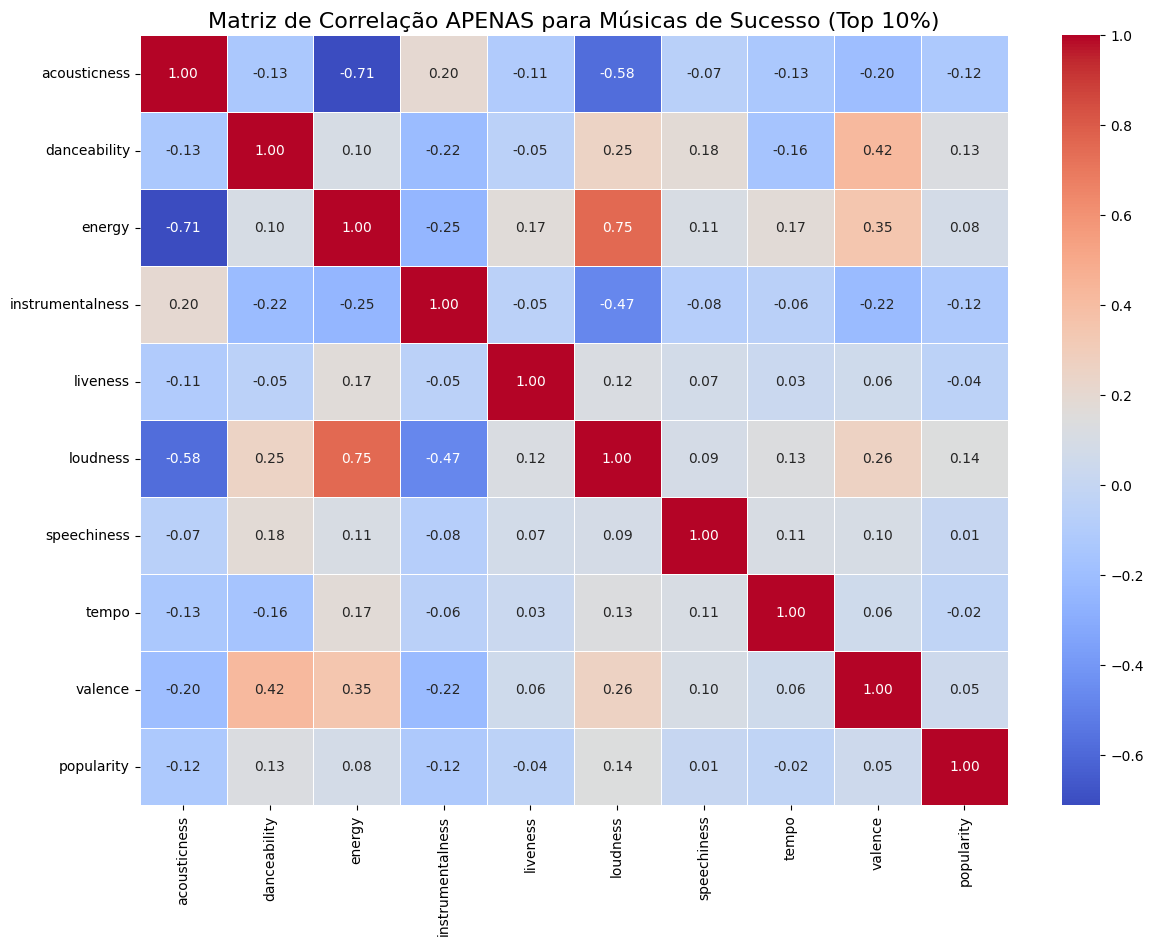

In [ ]:
# Lista de colunas para a análise
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                  'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
cols_for_correlation = audio_features + ['popularity']

# Calcular a matriz de correlação USANDO APENAS O DATAFRAME FILTRADO 'df_hits'
correlation_matrix_hits = df_hits[cols_for_correlation].corr()

# Gerar o mapa de calor (heatmap)
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix_hits,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Matriz de Correlação APENAS para Músicas de Sucesso (Top 10%)', fontsize=16)
plt.show()


/tmp/ipython-input-1518262207.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_corr_hits.values, y=popularity_corr_hits.index, palette='vlag')


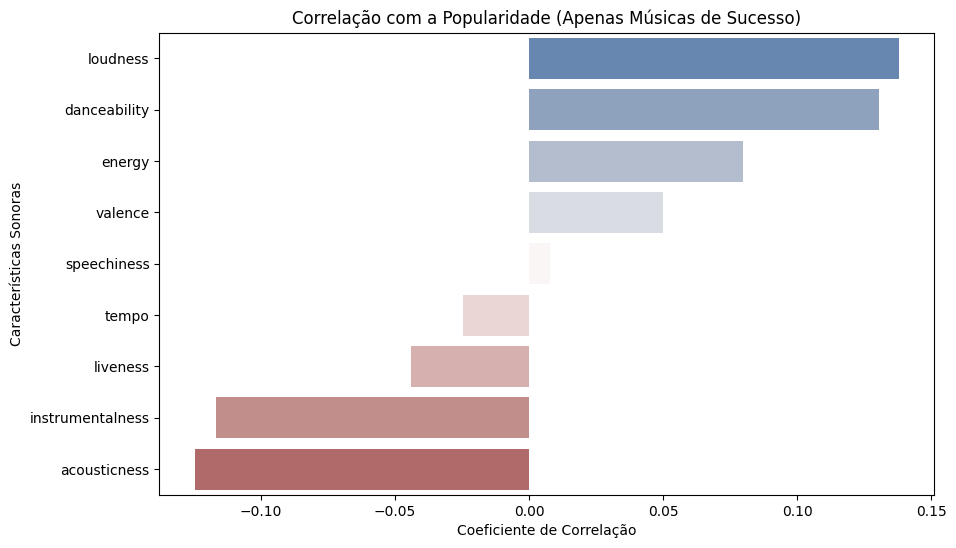

In [ ]:
# --- Visualizar as correlações com a popularidade em um gráfico de barras ---
popularity_corr_hits = correlation_matrix_hits['popularity'].drop('popularity').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_corr_hits.values, y=popularity_corr_hits.index, palette='vlag')
plt.title('Correlação com a Popularidade (Apenas Músicas de Sucesso)')
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Características Sonoras')
plt.show()


# **Criando a variável target**🎯


---
De acordo com a regra de negócio, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular . A popularidade é calculada pelo algoritmo e baseia -se, na maioria das vezes, no número total de peças que a faixa teve e como essas peças são recentes. De um modo geral, as músicas que estão sendo tocadas muito agora terão uma popularidade mais alta do que as músicas tocadas muito no passado.
As faixas duplicadas (por exemplo, a mesma faixa de um single e um álbum) são classificadas de forma independente. A popularidade do artista e do álbum é derivada matematicamente da popularidade da faixa.
Para criar a nossa coluna alvo do modelo preditivo, vamos utizar a coluna "popularity" para ser nosso critério de populares ou não.


In [ ]:
df['popularity'].describe()

,popularity
count,114000.000000
mean,33.238535
std,22.305078
min,0.000000
25%,17.000000
50%,35.000000
75%,50.000000
max,100.000000


In [ ]:
def categorizar_popularity(row):
    if row['popularity'] > 63:
        return 'popular'
    else:
        return 'não popular'

df['target'] = df.apply(categorizar_popularity, axis=1)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,hit_category,target
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Top 10% Popular,popular
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Não Popular,não popular
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Não Popular,não popular
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Top 10% Popular,popular
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Top 1% Viral,popular


# **Feature Engineering**  🛠️

Como próximo passo, vamos armazenar em um novo dataframe apenas as colunas necessárias para nossa classificação de músicas.

In [ ]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'hit_category', 'target'],
      dtype='object')

In [ ]:

colunas_para_remover = [
    'Unnamed: 0',
    'track_id',
    'artists',
    'album_name',
    'track_name',
    'release_date',
    'track_genre',
    'popularity',       # Usada para criar o alvo
    'hit_category',     # Alvo categórico
    'target'            # Alvo categórico
]


df_limpo_para_modelo = df.drop(columns=colunas_para_remover, errors='ignore')

print("\nColunas restantes que serão usadas como FEATURES (X):")
print(df_limpo_para_modelo.columns.tolist())


# X (features) são TODAS as colunas que sobraram no DataFrame limpo
X = df_limpo_para_modelo

# y (alvo) é a coluna 'target' do DataFrame original
y = df['target']

print(f"\nFeatures (X) e Alvo (y) definidos e prontos para a próxima etapa.")
print(f"Dimensões de X: {X.shape}")
print(f"Dimensões de y: {y.shape}")


Colunas restantes que serão usadas como FEATURES (X):
['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

Features (X) e Alvo (y) definidos e prontos para a próxima etapa.
Dimensões de X: (114000, 14)
Dimensões de y: (114000,)


# **Validando o modelo**⭐



## Regressão Logística, Random Forest e XGBoost


     AVALIANDO O MODELO: Regressão Logística

Relatório de Classificação:
              precision    recall  f1-score   support

 não popular       0.91      1.00      0.95     20719
     popular       0.00      0.00      0.00      2081

    accuracy                           0.91     22800
   macro avg       0.45      0.50      0.48     22800
weighted avg       0.83      0.91      0.87     22800


     AVALIANDO O MODELO: Random Forest


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Relatório de Classificação:
              precision    recall  f1-score   support

 não popular       0.96      1.00      0.98     20719
     popular       0.93      0.55      0.69      2081

    accuracy                           0.95     22800
   macro avg       0.94      0.77      0.83     22800
weighted avg       0.95      0.95      0.95     22800


     AVALIANDO O MODELO: XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:36:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Relatório de Classificação:
              precision    recall  f1-score   support

 não popular       0.91      1.00      0.95     20719
     popular       0.80      0.08      0.14      2081

    accuracy                           0.91     22800
   macro avg       0.86      0.54      0.55     22800
weighted avg       0.90      0.91      0.88     22800



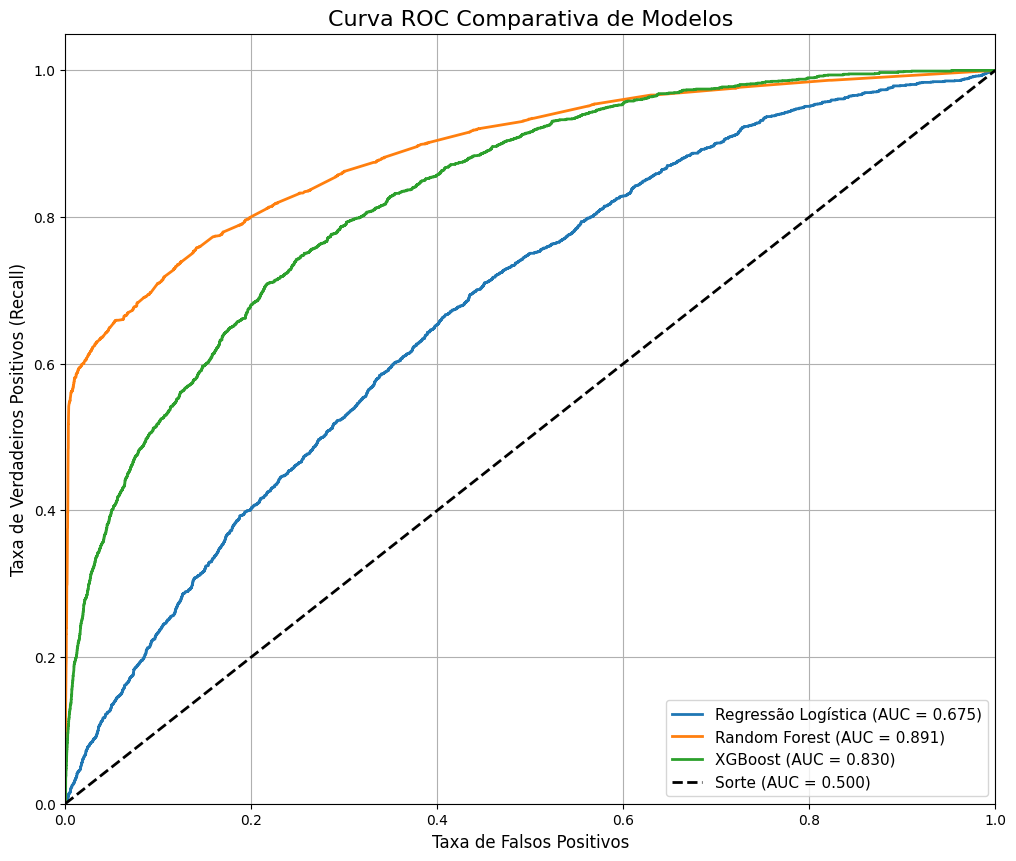

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


X_comp = df_limpo_para_modelo.copy()
y_comp = df['target'].copy() # Assumindo que 'target' tem 'popular' e 'não popular'

le_comp = LabelEncoder()
y_encoded_comp = le_comp.fit_transform(y_comp)

X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(
    X_comp, y_encoded_comp, test_size=0.2, random_state=42, stratify=y_encoded_comp
)

scaler_comp = StandardScaler()
X_train_scaled_comp = scaler_comp.fit_transform(X_train_comp)
X_test_scaled_comp = scaler_comp.transform(X_test_comp)



def roda_e_compara_modelos_binario(modelos, X_train, y_train, X_test, y_test, le):
    """
    Função autocontida para treinar, avaliar e plotar a Curva ROC de múltiplos modelos
    para CLASSIFICAÇÃO BINÁRIA.
    """
    plt.figure(figsize=(12, 10))
    lw = 2

    for nome, modelo in modelos.items():
        print(f"\n" + "="*50)
        print(f"     AVALIANDO O MODELO: {nome}")
        print("="*50)

        modelo.fit(X_train, y_train)
        predicoes = modelo.predict(X_test)

        print("\nRelatório de Classificação:")
        print(classification_report(y_test, predicoes, target_names=le.classes_))

        # Para a Curva ROC, precisamos das probabilidades da classe "positiva" (ex: 'popular')
        # .predict_proba(X_test)[:, 1] pega a probabilidade da segunda classe
        y_score = modelo.predict_proba(X_test)[:, 1]

        # Calcular a Curva ROC e a área (AUC)
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        # Plotar a Curva ROC
        plt.plot(fpr, tpr, lw=lw,
                 label=f'{nome} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw, label='Sorte (AUC = 0.500)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
    plt.ylabel('Taxa de Verdadeiros Positivos (Recall)', fontsize=12)
    plt.title('Curva ROC Comparativa de Modelos', fontsize=16)
    plt.legend(loc="lower right", fontsize=11)
    plt.grid(True)
    plt.show()


modelos_para_comparar = {
    'Regressão Logística': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}


roda_e_compara_modelos_binario(
    modelos_para_comparar,
    X_train_scaled_comp,
    y_train_comp,
    X_test_scaled_comp,
    y_test_comp,
    le_comp
)

## Modelo Final: Random Forest com balanceamento.


Dados divididos: 91200 para treino, 22800 para teste.

Features de treino e teste pré-processadas (scaling + one-hot encoding).
Nova dimensão de X_train: (91200, 29)

Treinando o modelo RandomForestClassifier...
Modelo treinado com sucesso!

--- Avaliação da Performance do Modelo ---

Acurácia Geral do Modelo: 94.98%

Relatório de Classificação:
              precision    recall  f1-score   support

 não popular       0.96      0.99      0.97     20719
     popular       0.82      0.57      0.68      2081

    accuracy                           0.95     22800
   macro avg       0.89      0.78      0.82     22800
weighted avg       0.95      0.95      0.95     22800


Matriz de Confusão:


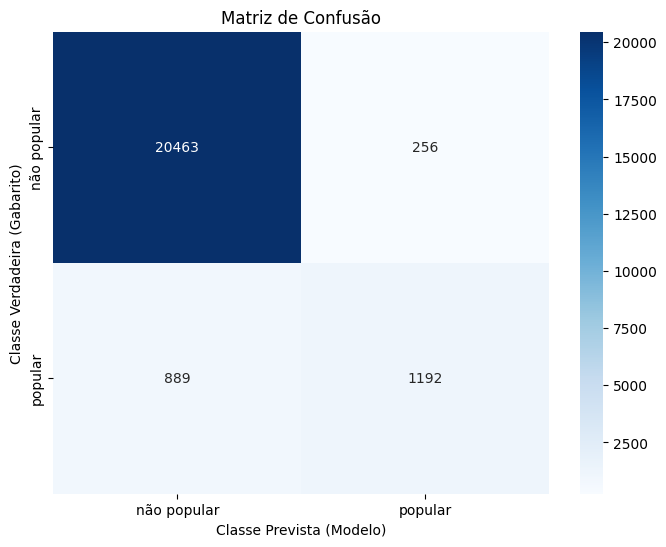

--- Gerando a Curva ROC  ---


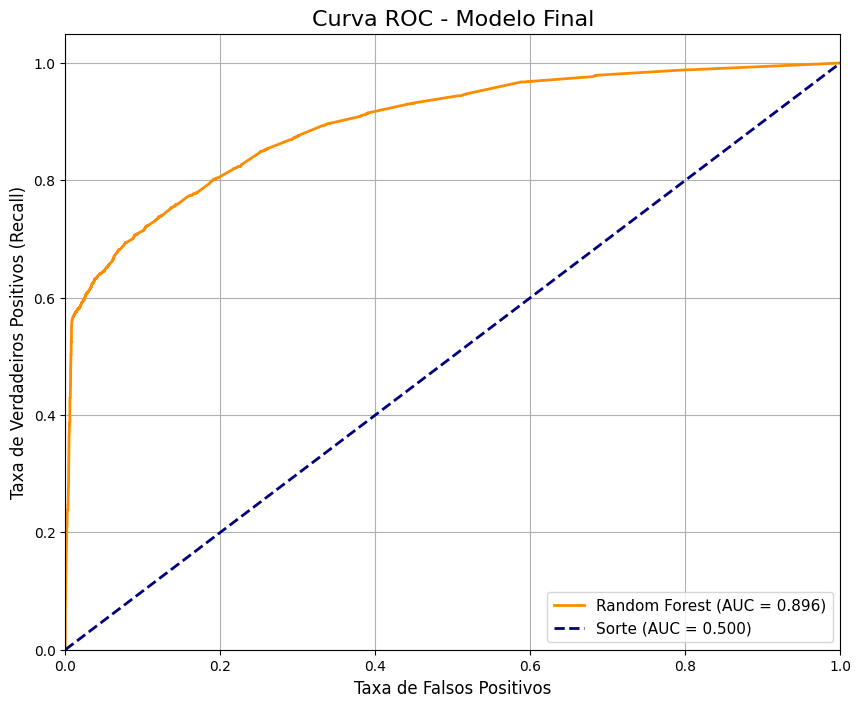

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


X = df_limpo_para_modelo
y = df['target']


le = LabelEncoder()
y_encoded = le.fit_transform(y)



# Lista de features numéricas que precisam ser normalizadas
numerical_features = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Lista de features categóricas que precisam de One-Hot Encoding
categorical_features = ['key', 'time_signature']

# Features binárias (explicit, mode) podem ser deixadas como estão.
# O ColumnTransformer as passará adiante sem modificação.


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Mantém as outras colunas (explicit, mode) intactas
)



X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.20, random_state=42, stratify=y_encoded
)
print(f"\nDados divididos: {len(X_train)} para treino, {len(X_test)} para teste.")



X_train_processed = preprocessor.fit_transform(X_train)

X_test_processed = preprocessor.transform(X_test)

print("\nFeatures de treino e teste pré-processadas (scaling + one-hot encoding).")

print(f"Nova dimensão de X_train: {X_train_processed.shape}")



print("\nTreinando o modelo RandomForestClassifier...")
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
model.fit(X_train_processed, y_train)
print("Modelo treinado com sucesso!")

print("\n--- Avaliação da Performance do Modelo ---")
predictions = model.predict(X_test_processed)

print(f"\nAcurácia Geral do Modelo: {accuracy_score(y_test, predictions) * 100:.2f}%")
print("\nRelatório de Classificação:")
print(classification_report(y_test, predictions, target_names=le.classes_))
print("\nMatriz de Confusão:")
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusão')
plt.ylabel('Classe Verdadeira (Gabarito)')
plt.xlabel('Classe Prevista (Modelo)')
plt.show()

print("--- Gerando a Curva ROC  ---")


# O método .predict_proba() retorna as probabilidades para cada classe.
# Para a curva ROC binária, nos interessa a probabilidade da classe "positiva" (que é a classe 1).
y_score = model.predict_proba(X_test_processed)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Random Forest (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Sorte (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)', fontsize=12)
plt.title('Curva ROC - Modelo Final', fontsize=16)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True)
plt.show()